In [2]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\DATA SETS\Cancer data"
os.chdir(path)
os.listdir(path)
Cancer_occurance= pd.read_csv("Cancer_Occurrence.csv")
Cancer= pd.read_csv("Cancer.csv")
State= pd.read_csv("State.csv")
Year_wise = pd.read_csv("Year wise Cancer Death-Rates.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cancer1 = Cancer.groupby('Category').size().reset_index()
cancer1.head()

,Category,0
0,Bones and Joints,1
1,Brain and Other Nervous System,2
2,Digestive System,12
3,Endocrine System,2
4,Eye and Orbit,1


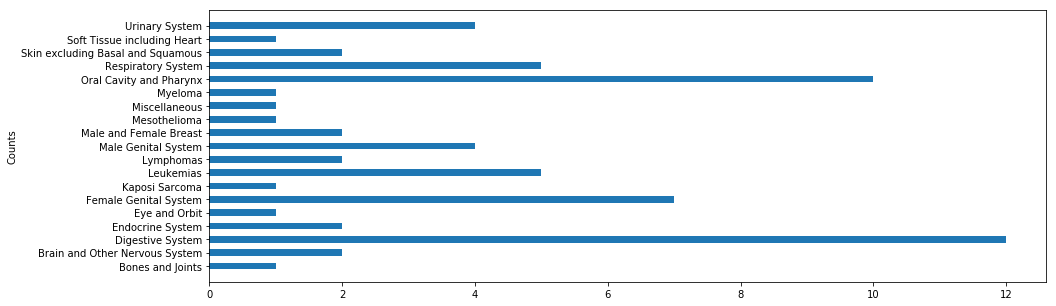

In [11]:
plt.figure(figsize=(15,5))
plt.barh(cancer1['Category'],cancer1[0],align='center',height=0.5)
plt.ylabel('Counts')
plt.show()

In [12]:
Cancer_occurance.head()

,Cancer_id,State_name,Race_name,Count
0,20010,Alabama,American Indian or Alaska Native,0
1,20010,Alabama,Asian or Pacific Islander,0
2,20010,Alabama,White,55
3,20010,Alabama,Other Races and Unknown combined,0
4,20010,Alaska,American Indian or Alaska Native,0


In [13]:
# H0 = Race an influnce on Cancer
# h1 = Race does not influence Cancer

# alpha = 0.05

In [14]:
from scipy.stats import chi2_contingency

In [16]:
count_table =pd.crosstab(index=Cancer_occurance.Count,columns=Cancer_occurance.Race_name)
count_table.head()

Race_name,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,Other Races and Unknown combined,White
Count,,,,,
0,1873,1332,853,1432,65
16,8,20,34,14,38
17,6,11,23,18,34
18,9,12,31,16,28
19,4,13,24,8,24


In [17]:
chi2_contingency(count_table)

(7277.871492041896,
 4.75594032949002e-210,
 3884,
 array([[1.12063262e+03, 9.84543805e+02, 1.02710656e+03, 9.85103841e+02,
         1.43761317e+03],
        [2.29976812e+01, 2.02048594e+01, 2.10783345e+01, 2.02163525e+01,
         2.95027725e+01],
        [1.85595322e+01, 1.63056760e+01, 1.70105857e+01, 1.63149511e+01,
         2.38092550e+01],
        ...,
        [2.01734046e-01, 1.77235608e-01, 1.84897671e-01, 1.77336425e-01,
         2.58796250e-01],
        [2.01734046e-01, 1.77235608e-01, 1.84897671e-01, 1.77336425e-01,
         2.58796250e-01],
        [2.01734046e-01, 1.77235608e-01, 1.84897671e-01, 1.77336425e-01,
         2.58796250e-01]]))

In [18]:
#For California Which Cancer type is decresing rapidly??

In [21]:
California = pd.merge(Cancer,Cancer_occurance,left_on='Id',right_on='Cancer_id',how='inner')
California.head()

,Id,Name,Category,Cancer_id,State_name,Race_name,Count
0,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,American Indian or Alaska Native,0
1,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,Asian or Pacific Islander,0
2,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,White,55
3,20010,Lip,Oral Cavity and Pharynx,20010,Alabama,Other Races and Unknown combined,0
4,20010,Lip,Oral Cavity and Pharynx,20010,Alaska,American Indian or Alaska Native,0


In [23]:
q8=Year_wise.groupby(['Year','Locality'])['Observed Deaths'].sum().reset_index()
q8.head()

,Year,Locality,Observed Deaths
0,2005,Metropolitan,8845728.0
1,2005,Nonmetropolitan,2039406.0
2,2006,Metropolitan,8856210.0
3,2006,Nonmetropolitan,2035764.0
4,2007,Metropolitan,8852160.0


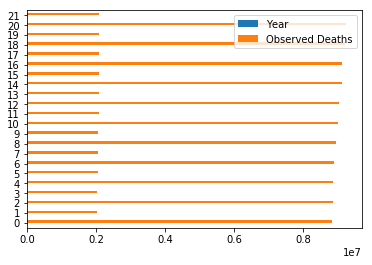

In [25]:
q8.plot(kind='barh')

In [28]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA SETS\IPL Data"
os.chdir(path)
os.listdir(path)
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
player = pd.read_excel("Player.xlsx")
season = pd.read_excel('Season.xlsx')
team =pd.read_excel("Team.xlsx")

In [30]:
won_match=pd.crosstab(index=match.Team_Name_Id,columns='Total Wins').reset_index()
won_match

col_0,Team_Name_Id,Total Wins
0,1,62
1,2,78
2,3,74
3,4,65
4,5,52
5,6,69
6,7,62
7,8,39
8,9,7
9,10,23


In [38]:
Team = team[['Team_Id','Team_Name']]

In [42]:
Team_wise_win = pd.merge(won_match,Team,left_on='Team_Name_Id',right_on='Team_Id').reset_index()
Team_wise_win = Team_wise_win[['Team_Name','Total Wins']]
Team_wise_win.sort_values(by='Total Wins',ascending=False)


,Team_Name,Total Wins
1,Royal Challengers Bangalore,78
2,Chennai Super Kings,74
5,Delhi Daredevils,69
3,Kings XI Punjab,65
0,Kolkata Knight Riders,62
6,Mumbai Indians,62
4,Rajasthan Royals,52
7,Deccan Chargers,39
10,Sunrisers Hyderabad,30
9,Pune Warriors,23


In [43]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\DATA SETS\Cars"
os.chdir(path)
os.listdir(path)

hr_df=pd.read_csv("HR Analytics.csv")

In [44]:
hr_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,11,3,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,23,4,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,6,15,3,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,11,3,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,9,12,3,4,6,3,2,2,2,2


In [45]:
# 1.    What proportion of our staff are leaving?

In [59]:
round(len(hr_df[(hr_df['Attrition']==1)])/len(hr_df.Attrition)*100)

16

In [60]:
# What role does gender and age play in this workspace

In [61]:
gen_age = hr_df[['Attrition','Gender','Age','Department']]
gen_age.head()

,Attrition,Gender,Age,Department
0,1,Female,41,Sales
1,0,Male,49,Research & Development
2,1,Male,37,Research & Development
3,0,Female,33,Research & Development
4,0,Male,27,Research & Development


In [64]:
gen_age1=gen_age[gen_age['Attrition']==1]
gen_age1.head()

,Attrition,Gender,Age,Department
0,1,Female,41,Sales
2,1,Male,37,Research & Development
14,1,Male,28,Research & Development
21,1,Male,36,Sales
24,1,Male,34,Research & Development


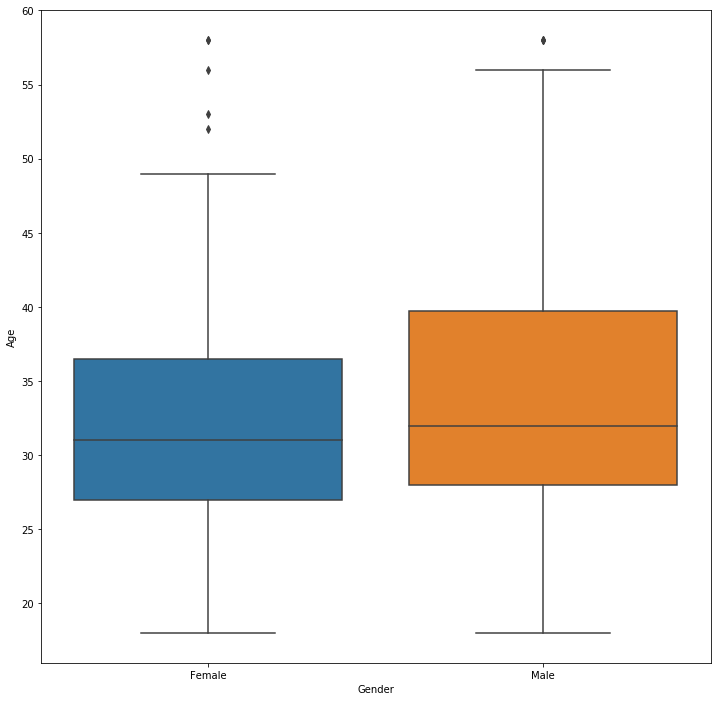

In [65]:
plt.figure(figsize=(12,12))
sns.boxplot(data=gen_age1,x='Gender',y='Age')

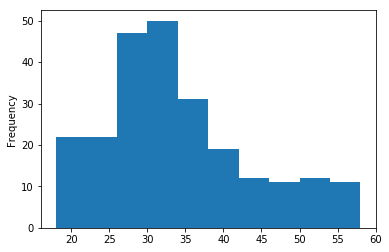

In [66]:
hr_df[hr_df.Attrition==1]['Age'].plot(kind='hist')

In [67]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\DATA SETS\US Homicide"
os.chdir(path)
os.listdir(path)

crime=pd.read_csv("Homicide.csv",low_memory=False)

In [68]:
# NUMBER OF INCIDENTS PER STATES PER YEAR?

In [69]:
crime.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [73]:
incident_per_state = crime.groupby(['State','Year'])['Record ID'].count().reset_index()
incident_per_state.sort_values(by='Record ID',ascending=False).head(2)

,State,Year,Record ID
152,California,1993,4369
151,California,1992,4195


In [74]:
# WHICH MONTH WIFE"S HAVE MORE TENDENCY TO HURT HUSBAND?

In [78]:
q=crime[(crime['Victim Sex']=='Male') & (crime['Perpetrator Sex']=='Female') & (crime['Relationship']=='Husband')]
q1=q.groupby('Month')['Record ID'].count().reset_index()
q1=q1.rename(columns = {'Record ID': 'Total Incident'})
q1.sort_values(by='Total Incident',ascending=False)

,Month,Total Incident
5,July,827
2,December,765
6,June,758
1,August,755
8,May,740
7,March,724
11,September,718
4,January,707
0,April,656
9,November,650
